In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn)
data.head()

,index,crypto,time,open,high,low,close,volume,trade
0,0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
data.to_csv("exported-data.csv")

In [5]:
data = data.drop(labels=["index"], axis=1)
data

,crypto,time,open,high,low,close,volume,trade
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700
...,...,...,...,...,...,...,...,...
6024,solana_usdt,1.637798e+09,205.76000000,216.35000000,201.93000000,209.97000000,1764837.19000000,886350.87000000
6025,solana_usdt,1.637885e+09,209.94000000,210.53000000,182.70000000,192.42000000,2776105.44000000,1241556.23000000
6026,solana_usdt,1.637971e+09,192.37000000,199.39000000,190.61000000,192.74000000,1028955.27000000,500367.73000000
6027,solana_usdt,1.638058e+09,192.74000000,202.10000000,180.93000000,200.69000000,1560980.85000000,789804.92000000


In [6]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)

In [7]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [8]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,crypto,open,high,low,close,volume,trade
time,,,,,,,
2017-11-29,ethereum_usdt,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,ethereum_usdt,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,ethereum_usdt,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,ethereum_usdt,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,ethereum_usdt,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
2021-11-25,ethereum_usdt,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,ethereum_usdt,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,ethereum_usdt,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [9]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [10]:
ethereum_df.to_csv("Etherum_df.csv")

In [11]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [12]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [13]:
#take only the first 365 rows.
ethereum_df = ethereum_df.iloc[:365]

In [14]:
X = ethereum_df.drop("close", axis=1)
X

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2018-11-24,125.00,130.81,112.32,471321.56764,234287.59828
2018-11-25,114.83,122.35,102.95,836233.31252,431382.20248
2018-11-26,118.65,121.50,106.41,679477.36231,347673.90799


In [15]:
# Set y label

y = ethereum_df[["close"]]
y

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2018-11-24,114.89
2018-11-25,118.67
2018-11-26,110.68


In [16]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-11-29 to 2018-11-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    365 non-null    float64
 1   high    365 non-null    float64
 2   low     365 non-null    float64
 3   close   365 non-null    float64
 4   volume  365 non-null    float64
 5   trade   365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [17]:
# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, shuffle = False)

In [18]:
train = ethereum_df.loc["2017-11": "2018-10"]
test = ethereum_df.loc["2018-11"]


In [19]:
train

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2018-10-27,204.92,206.15,203.09,204.45,50235.68329,25242.25884
2018-10-28,204.45,205.94,203.62,204.99,44394.83357,22645.86435
2018-10-29,204.99,205.49,195.28,196.96,118281.82272,59069.05972


In [20]:
test

,open,high,low,close,volume,trade
time,,,,,,
2018-11-01,198.70,200.95,197.88,199.96,86097.98629,43875.99353
2018-11-02,199.93,203.74,199.34,202.35,97123.22813,51072.05675
2018-11-03,202.31,202.69,198.59,200.31,72084.92932,37513.43651
2018-11-04,200.27,218.76,199.00,212.11,182534.62160,88110.04676
2018-11-05,212.13,213.39,207.62,210.66,141432.14060,68965.02718
2018-11-06,210.64,221.25,209.11,220.74,197797.49527,102842.82059
2018-11-07,220.77,224.80,217.01,219.07,204931.03420,105369.57327
2018-11-08,219.06,220.78,212.49,212.79,189828.49450,92343.52623
2018-11-09,212.79,215.51,209.10,210.77,152215.94686,77629.77249


In [21]:
X_train, y_train = train.drop("close", axis=1), train[["close"]]
X_test, y_test =  test.drop("close", axis=1), test[["close"]]

In [22]:
X_train

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2018-10-27,204.92,206.15,203.09,50235.68329,25242.25884
2018-10-28,204.45,205.94,203.62,44394.83357,22645.86435
2018-10-29,204.99,205.49,195.28,118281.82272,59069.05972


In [23]:
y_train

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2018-10-27,204.45
2018-10-28,204.99
2018-10-29,196.96


In [24]:
# Create model
model = LinearRegression()

In [25]:
# tscv = TimeSeriesSplit(n_splits=12, max_train_size=0.8)
# #print(tscv)

# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X[int(train_index)], X[int(test_index)]
#     y_train, y_test = y[int(train_index)], y[int(test_index)]


In [26]:
# Scale the data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [27]:
# Apply the StandardScaler to the train and test daatsets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
predictions = model.predict(X_test_scaled)

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_test, predictions)

2.626961189933933

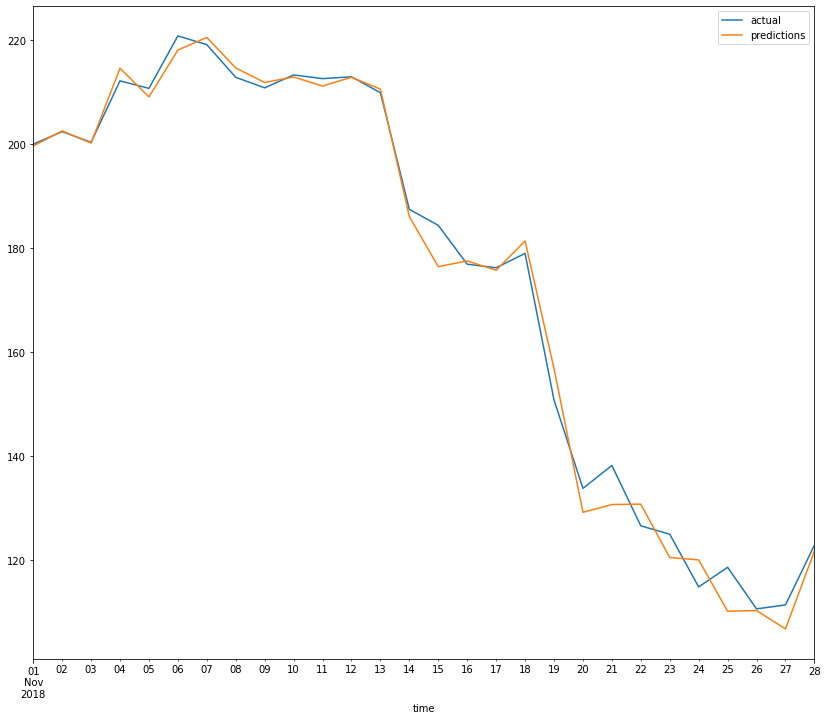

In [36]:
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data.plot(figsize=(14,12));

In [54]:
data = pd.DataFrame()
data["scores"] = model.coef_[0]
data["features"] = X_train.columns.tolist()
data

,scores,features
0,-123.722073,open
1,266.116924,high
2,124.478094,low
3,-11.919873,volume
4,11.012752,trade


<AxesSubplot:xlabel='features'>

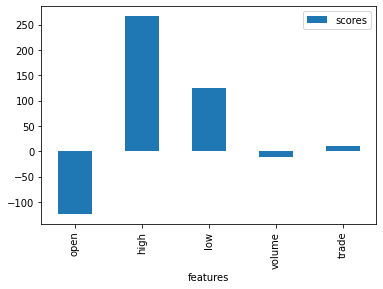

In [56]:
data.plot(kind="bar", x="features", y="scores")

In [30]:
#print confindence score
model_score = model.score(X_test_scaled, y_test)

print(f"Model R2 Score: {model_score}")

Model R2 Score: 0.9914955684161761


In [ ]:
# Create a variable called X_project and set it equal to the last 14 rows of the original dataset
#X_projection = np.array(etherum_df[["close"]])